This notebook will explain what a function that fits both transits and occultations ought to look like.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

filename = "apjlab5c16t5.csv"
data = np.genfromtxt(filename, delimiter=',', names=True, dtype=None, encoding=None)
print(data[0])

('tra', 2454515.52496, 0.00043, -1640, ' H09')


[[Model]]
    Model(lin_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 158
    # variables        = 2
    chi-square         = 376.593790
    reduced chi-square = 2.41406275
    Akaike info crit   = 141.234391
    Bayesian info crit = 147.359581
    R-squared          = 1.00000000
[[Variables]]
    P:   1.09141964 +/- 4.2103e-08 (0.00%) (init = 1.091423)
    T0:  2456305.46 +/- 4.0378e-05 (0.00%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(P, T0) = -0.3892


<ErrorbarContainer object of 3 artists>

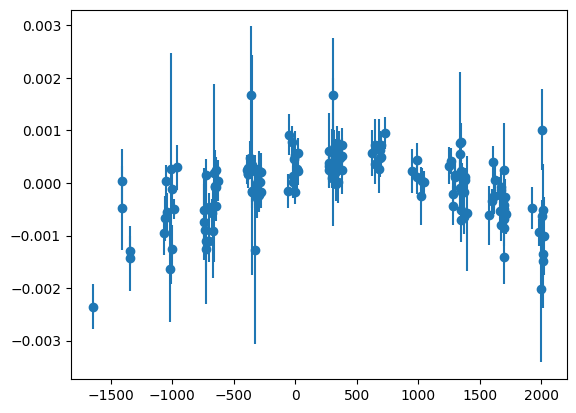

In [25]:
def lin_fit(E, P, T0, is_occultation=None):
    ret_val = np.zeros(len(E))
   
    if(is_occultation is None):
    # Default to transit times    
        ret_val = T0 + P*E
    
    else:
        ind = is_occultation == 0.
        
        # transit ephemeris
        ret_val[ind] = T0 + P*E[ind]

        # eclipse/occultation ephemeris
        ret_val[~ind] = (T0 + 0.5*P) + P*E[~ind]
        
    return ret_val

# We need some way to flag the occultations and distinguish them from transits.
is_occultation = [data[i][0] == "occ" for i in range(len(data))]

E = np.array([data[i][3] for i in range(len(data))])
mid_times = np.array([data[i][1] for i in range(len(data))])
mid_times_unc = np.array([data[i][2] for i in range(len(data))])

# print(data[0])
# ('tra', 2454515.52496, 0.00043, -1640, ' H09')

# turn your curve function into an lmfit Model - https://lmfit.github.io/lmfit-py/model.html
model = Model(lin_fit,independent_vars=['E','is_occultation'])

# create parameters for the fit, giving decent initial values
# note that n will use the default function value by default
params = model.make_params(T0=0., P=1.091423, is_occultation=is_occultation)

# do the fit
result = model.fit(mid_times, params, weights=1.0/mid_times_unc, E=E, is_occultation=is_occultation)

# print out fit report
print(result.fit_report())

plt.errorbar(E, mid_times - result.eval(), yerr=mid_times_unc, ls='', marker='o')